#EDA

##First of all we analyze and understand data by summarizing its key characteristics.

##Importing necessary library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

##Let's read the DataSet

In [ ]:
df = pd.read_csv('/content/data (1).csv')
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
#Lets see the shape of our Data.
df.shape

(944, 10)

So, it's tell us that our Data has **944 ROWS** and **10 COLUMNS**

In [ ]:
#now we will check the data types of all columns
df.dtypes

,0
footfall,int64
tempMode,int64
AQ,int64
USS,int64
CS,int64
VOC,int64
RP,int64
IP,int64
Temperature,int64
fail,int64


All Columns has **INTEGER DATA TYPE.**

##Now we will **check** is there any **null values** are there ?

In [ ]:
df.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


##There is **no null values** in our DataSet

##Let's get the **description** of our DataSet

In [ ]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


## Analyze the **distribution** of the target variable **'fail'**

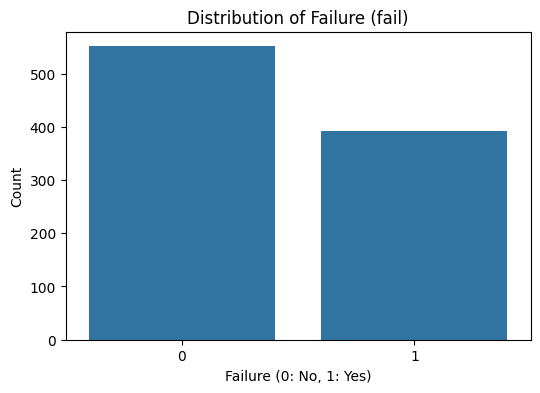

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fail', data=df)
plt.title('Distribution of Failure (fail)')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

##Now let's make the **HEATMAP**

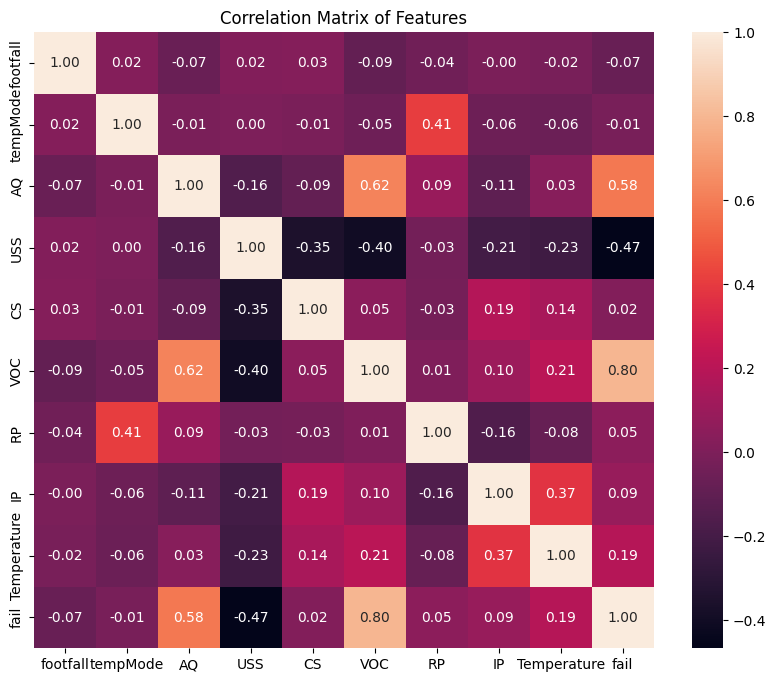

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Analyze the **relationship** between **'Temperature' and 'fail'**

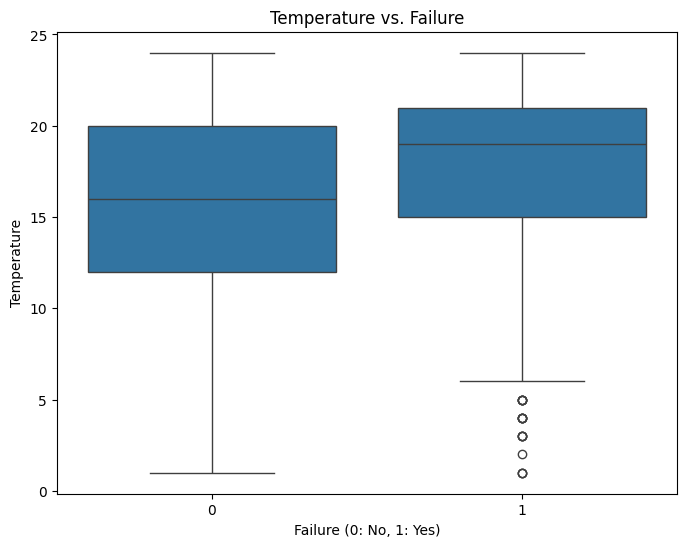

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fail', y='Temperature', data=df)
plt.title('Temperature vs. Failure')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('Temperature')
plt.show()

##Analyze the **relationship** between **'footfall' and 'fail'**

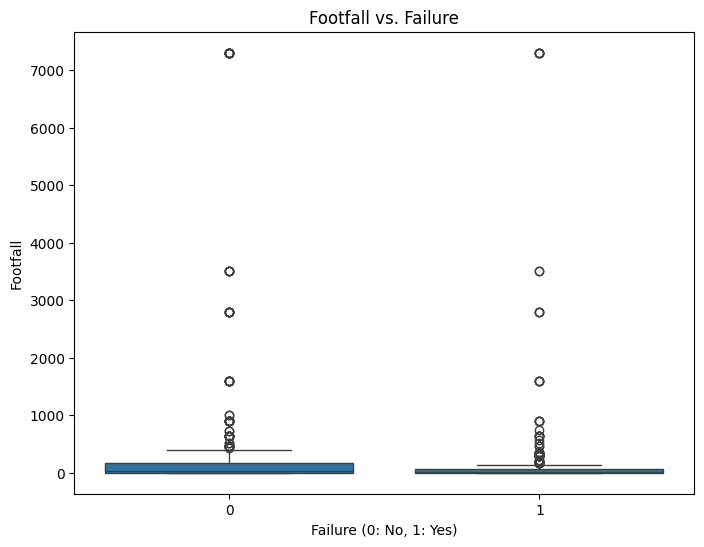

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fail', y='footfall', data=df)
plt.title('Footfall vs. Failure')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('Footfall')
plt.show()

**Reasoning**: The previous code block created several plots based on the steps outlined in the project guide. Further analysis of other features and their connection to the target variable 'fail' may be necessary. Additionally, we may need to make some data transformation steps based on the distributions seen in the plots or mentioned in the guide. Since the earlier data understanding step did not indicate any specific data cleaning or transformation needs (there are no missing values), I will move forward with further analysis and visualization as the document suggests. I will specifically look at the relationship between 'AQ', 'VOC', and 'USS' with 'fail' because they show relatively higher correlations with 'fail' in the heatmap.

## Analyze the **relationship** between **'AQ' and 'fail'**

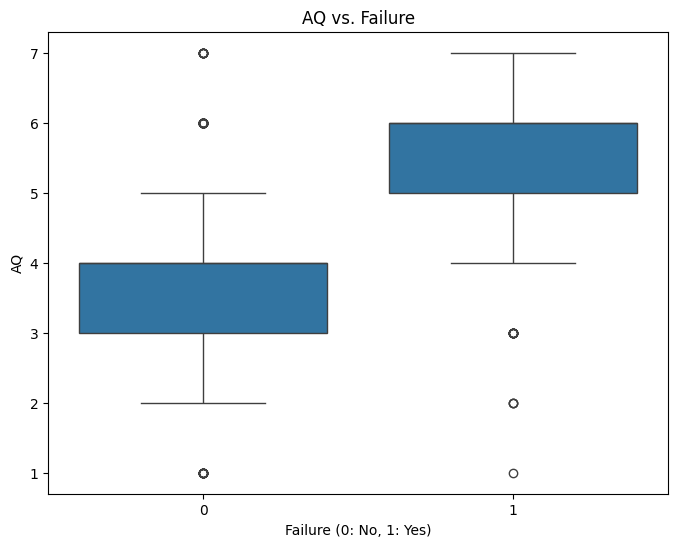

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fail', y='AQ', data=df)
plt.title('AQ vs. Failure')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('AQ')
plt.show()

## Analyze the **relationship** between **'VOC' and 'fail'**

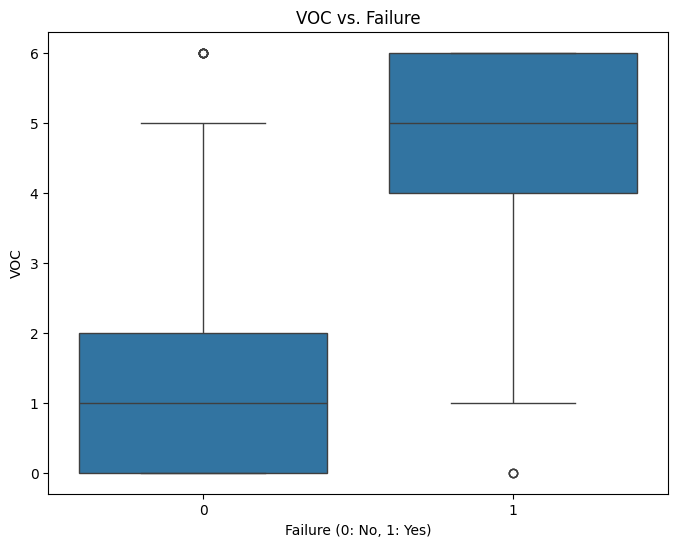

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fail', y='VOC', data=df)
plt.title('VOC vs. Failure')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('VOC')
plt.show()

## Analyze the **relationship** between **'USS' and 'fail'**

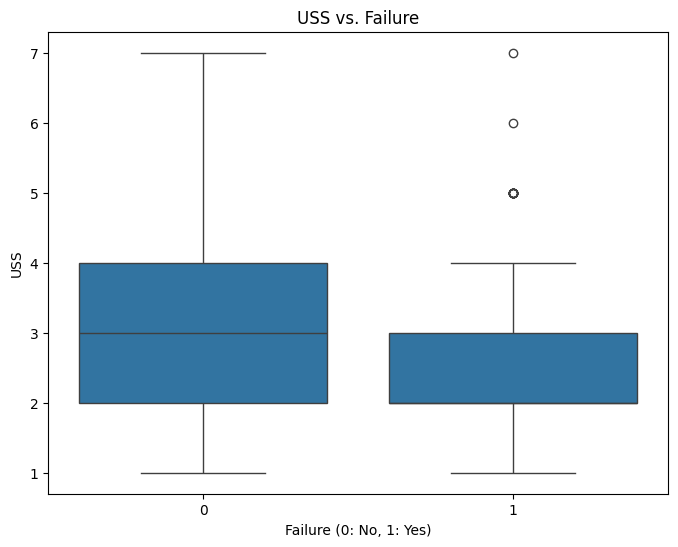

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fail', y='USS', data=df)
plt.title('USS vs. Failure')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('USS')
plt.show()

**Reasoning**: The next steps likely involve getting the data ready for modeling. This could include selecting features, scaling, and dividing the data into training and testing sets. We have already done initial analysis and visualized the relationships between features and the target variable

**Remove Outliers**


In [ ]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows outside 1.5 * IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


##Split data and Train model


In [ ]:
from sklearn.model_selection import train_test_split
y = df['fail']
X = df.drop('fail', axis=1)
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature'],
      dtype='object')


##Use Random Forest Classifier Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

##Check Accuracy Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100, "%")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100, "%")

Train Accuracy: 100.0 %
Test Accuracy: 87.68115942028986 %


##Provide some new input to predict output

In [ ]:
new_input = {
    'footfall': 45,
    'tempMode': 1,
    'AQ': 30,
    'USS': 0.2,
    'CS': 0.3,
    'VOC': 0.1,
    'RP': 0.4,
    'IP': 0.9,
    'Temperature': 24
}  #Test new input

new_df = pd.DataFrame([new_input]) #convert in to DataFrame
prediction = model.predict(new_df)[0] #Predict the output

print("[0] means FAIL, [1] means PASS")
print("\nPrediction for new input:", "0" if prediction == 1 else "1")

[0] means FAIL, [1] means PASS

Prediction for new input: 1
